# Linear regression (Stochastic Gradient Descent, Fixed Learning Rate)

In [6]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Fake data generation

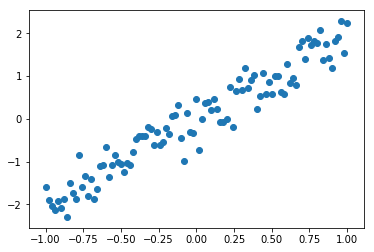

In [7]:
x_train = np.linspace(-1, 1, 101)
y_train = 2 * x_train + np.random.randn(*x_train.shape) * 0.33

plt.scatter(x_train, y_train)

## TF

In [8]:
LEARNING_RATE = 0.01
TRAINING_EPOCHS = 100

x = tf.placeholder(tf.float32) # features (input)
w = tf.Variable(0.0, name="weights")
b = tf.Variable(0.0, name="biases")
y = tf.multiply(x, w) + b # output
y_ = tf.placeholder(tf.float32) # labels

cost = tf.reduce_mean(tf.square(y-y_))
train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cost)

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(TRAINING_EPOCHS):
    for (_x, _y) in zip(x_train, y_train):
        sess.run(train_op, feed_dict={x: _x, y_: _y})
        
w_val = sess.run(w)
print(w_val)
sess.close()

1.96413


## Plot of learned model

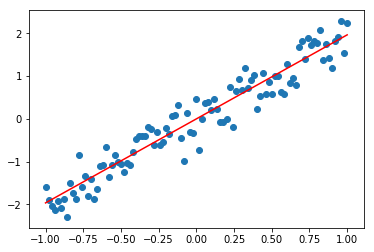

In [9]:
plt.scatter(x_train, y_train)
y_learned = x_train*w_val
plt.plot(x_train, y_learned, 'r')
plt.show()